In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (9.0, 7.0)

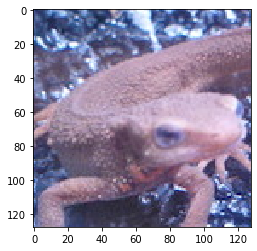

In [3]:
img = cv2.imread('imori.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Task 21: Hitogram Normalization

In [57]:
def normalize_hist(img, new_min, new_max):
    old_min, old_max = np.min(img), np.max(img)
    shape = img.shape
    out = img.copy()
    
    out = np.where(
        ((out >= old_min) & (out < old_max)), 
        (new_max - new_min) / (old_max - old_min) * (out - old_min) + new_min,
        new_max
    )
    
    out[out < 0] = 0
    out[out > 255] = 255
    out = out.astype(np.uint8)
    
    return out

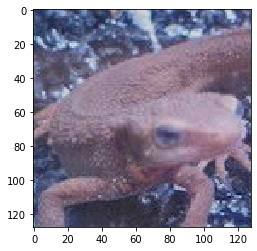

In [58]:
img = cv2.imread('imori_dark.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_norm = normalize_hist(img, 0, 255)
plt.imshow(img_norm)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 1.600e+01, 0.000e+00,
        0.000e+00, 2.600e+01, 0.000e+00, 0.000e+00, 7.400e+01, 0.000e+00,
        0.000e+00, 1.150e+02, 0.000e+00, 0.000e+00, 1.800e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 3.340e+02, 0.000e+00, 0.000e+00, 5.030e+02,
        0.000e+00, 0.000e+00, 6.100e+02, 0.000e+00, 0.000e+00, 6.930e+02,
        0.000e+00, 0.000e+00, 7.070e+02, 0.000e+00, 0.000e+00, 7.260e+02,
        0.000e+00, 0.000e+00, 7.860e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        8.300e+02, 0.000e+00, 0.000e+00, 9.020e+02, 0.000e+00, 0.000e+00,
        1.007e+03, 0.000e+00, 0.000e+00, 1.026e+03, 0.000e+00, 0.000e+00,
        1.147e+03, 0.000e+00, 0.000e+0

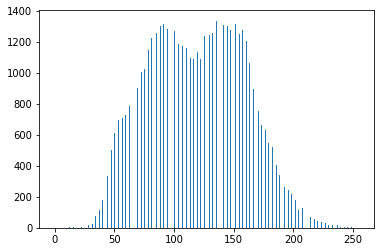

In [59]:
plt.hist(img_norm.ravel(),bins=255, rwidth=0.8, range=(0, 255))

# Task 22: Histgram Manipulation

In [60]:
def hist_manipulation(img, mean, std):
    out = img.copy()
    mean_old = np.mean(out)
    std_old = np.std(out)
    
    out = (std / std_old) * (out - mean_old) + mean
    out[out < 0] = 0
    out[out > 255] = 255
    out = out.astype(np.uint8)

    return out

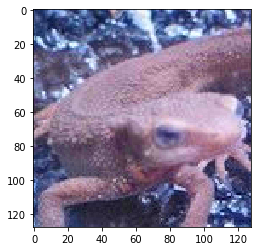

In [61]:
img = cv2.imread('imori_dark.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_alt = hist_manipulation(img, 128, 52)
plt.imshow(img_alt)

(array([   7.,    0.,    2.,    0.,    0.,    0.,    7.,    0.,    0.,
           0.,   16.,    0.,    0.,    0.,   26.,    0.,    0.,    0.,
          74.,    0.,    0.,    0.,    0.,  115.,    0.,    0.,    0.,
         180.,    0.,    0.,    0.,  334.,    0.,    0.,    0.,  503.,
           0.,    0.,    0.,  610.,    0.,    0.,    0.,  693.,    0.,
           0.,    0.,  707.,    0.,    0.,    0.,  726.,    0.,    0.,
           0.,  786.,    0.,    0.,    0.,  830.,    0.,    0.,    0.,
         902.,    0.,    0.,    0., 1007.,    0.,    0.,    0., 1026.,
           0.,    0.,    0.,    0., 1147.,    0.,    0.,    0., 1224.,
           0.,    0.,    0., 1257.,    0.,    0.,    0., 1302.,    0.,
           0.,    0., 1316.,    0.,    0.,    0., 1283.,    0.,    0.,
           0., 1185.,    0.,    0.,    0., 1268.,    0.,    0.,    0.,
        1186.,    0.,    0.,    0., 1174.,    0.,    0.,    0., 1159.,
           0.,    0.,    0., 1092.,    0.,    0.,    0.,    0., 1086.,
      

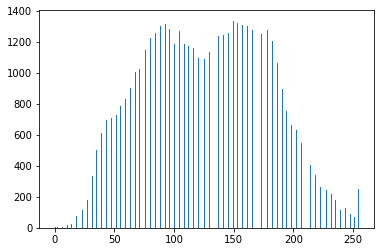

In [62]:
plt.hist(img_alt.ravel() ,bins=255, rwidth=0.8, range=(0, 255))